<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/NLP_Sentiment_Based_Quoting_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have now determined the type of data our web application is going to need. Data for a Data driven application, represents the primordial matter. Ideally, it is both of high-quality and plentiful. Depending on the type of data science you are tackling some may need to be easy to get, or hard to get. Some may need to be highly predictive, or very opaque, depending whether you want others to discover it or you would rather deeply hidden and only you hold the key - think hedge funds like renaissance capital who's made billions of dollars by digging deep into statistical models.

Collecting Quotes
As we are going to use famous quotes as our data, we are facing easy situation, quotes are plentiful on the Internet. You probably could even buy huge repository full of quotes. But I am using a different approach, I like to vet every single one of them. I want make sure they make me feel good, I can assume that that make my community of friends on Twitter feel good as well... by proxy

So I'll share my stash of quotes with you, I'm going to pull one quote for every author. I have dozens and dozens of quotes from Albert Einstein or Richard Feynman, but here I'm on the pull one of each. I'm assuming if you like this project and you want to build your own quote machine, you will want to go out and find your own quotes, those that make you feel good.

A great source is https://www.goodreads.com/ as it is all text based and it has a voting system so you can quickly jump to the popular ones and avoid the weird stuff. Let me walk you through how I pull the data. I'll go with "Richard Branson".

In [ ]:
import pandas as pd
quotes = pd.read_csv('quote_stash.csv')
quotes = quotes[['quote', 'author']]
quotes.head()


,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [ ]:
quotes.shape

(108, 2)

In [ ]:
quotes.to_csv('quotes.csv', index=None)

In [ ]:
quotes_test = pd.read_csv('quotes_test.csv')
quotes_test.head()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
quotes = pd.read_csv('quotes.csv')
print(quotes.shape)
quotes.head()

(108, 2)


,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [ ]:
for sentence in quotes['quote']:
    print(sentence)
    break

Pain is inevitable, but misery is optional.


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

all_compounds = []
for sentence in quotes['quote']:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

        if k == 'compound':
            all_compounds.append(ss[k])

Pain is inevitable, but misery is optional.
compound: -0.802, 
neg: 0.59, 
neu: 0.41, 
pos: 0.0, 
To avoid criticism, do nothing, say nothing, be nothing.
compound: -0.6249, 
neg: 0.421, 
neu: 0.579, 
pos: 0.0, 
Believe and act as if it were impossible to fail.
compound: -0.5423, 
neg: 0.28, 
neu: 0.72, 
pos: 0.0, 
Never get out of the boat. Absolutely goddamn right. Unless you were goin' all the way.
compound: -0.5256, 
neg: 0.184, 
neu: 0.816, 
pos: 0.0, 
Nobody can make you feel inferior without your consent.
compound: -0.5213, 
neg: 0.384, 
neu: 0.616, 
pos: 0.0, 
What we fear doing most is usually what we most need to do.
compound: -0.4939, 
neg: 0.211, 
neu: 0.789, 
pos: 0.0, 
Everything you’ve ever wanted is on the other side of fear.
compound: -0.4939, 
neg: 0.242, 
neu: 0.758, 
pos: 0.0, 
Success is going from failure to failure without losing your enthusiasm.
compound: -0.4805, 
neg: 0.431, 
neu: 0.287, 
pos: 0.282, 
If there is no struggle, there is no progress.
compound: -0

In [ ]:
all_compounds[0:10]

[-0.802,
 -0.6249,
 -0.5423,
 -0.5256,
 -0.5213,
 -0.4939,
 -0.4939,
 -0.4805,
 -0.4404,
 -0.3612]

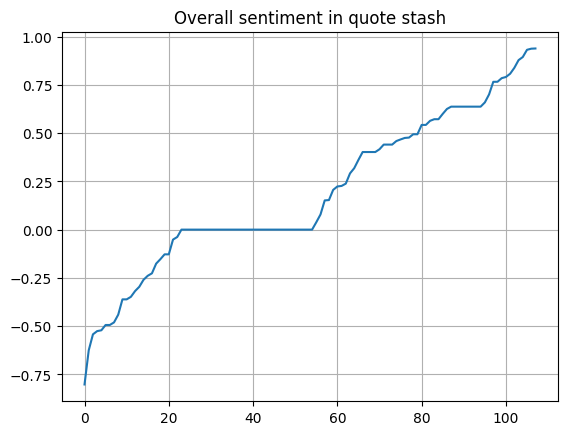

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(sorted(all_compounds))
plt.title('Overall sentiment in quote stash')
plt.grid()

In [ ]:
quotes['sentiment_score'] = all_compounds
quotes.head()

,quote,author,sentiment_score
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249
2,Believe and act as if it were impossible to fail.,Charles Kettering,-0.5423
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt,-0.5213


In [ ]:
import numpy as np

# the most negative
np.min(quotes['sentiment_score'])

-0.802

In [ ]:
# the most positive
np.max(quotes['sentiment_score'])

0.9382

In [ ]:
# the most negative
quotes[quotes['sentiment_score'] == np.min(quotes['sentiment_score']) ]

,quote,author,sentiment_score
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.802


In [ ]:
# the most positive
quotes[quotes['sentiment_score'] == np.max(quotes['sentiment_score']) ]

,quote,author,sentiment_score
107,"When we are mindful, deeply in touch with the ...",Thich Nhat Hanh,0.9382


In [ ]:
# the most negative
quotes[quotes['sentiment_score'] == np.max(quotes['sentiment_score']) ]['quote'].values

array(['When we are mindful, deeply in touch with the present moment, our understanding of what is going on deepens, and we begin to be filled with acceptance, joy, peace and love.'],
      dtype=object)

Create quote movement
Now that we have all the building blocks necessary (grand vision, quote stash, sentiment algorithm), let's figure out our internal quote distribution engine and abstract it into one or two clean functions. We need to figure out two things:

Loading the quote stash and assigning an index score
Handling user requests for new quotes, up or down the sentiment ladde

In [ ]:
import pandas as pd
import numpy as np
from random import randrange

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# declare global variable
quotes = None

def prepare_sentiment_quote_stash(quote_stash_path):
    global quotes

    # load the quote stash
    quotes = pd.read_csv(quote_stash_path)

    sid = SentimentIntensityAnalyzer()

    all_compounds = []
    for sentence in quotes['quote']:
        ss = sid.polarity_scores(sentence)
        for k in sorted(ss):
            if k == 'compound':
                all_compounds.append(ss[k])


    # add sentiment to the data
    quotes['sentiment_score'] = all_compounds

    # create ladder index
    quotes = quotes.sort_values('sentiment_score')
    quotes['index'] = [ix for ix in range(0, len(quotes))]

    return quotes




prepare_sentiment_quote_stash('quotes.csv')
quotes.head()


,quote,author,sentiment_score,index
0,"Pain is inevitable, but misery is optional.",Tim Hansel,-0.8020,0
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard,-0.6249,1
2,Believe and act as if it were impossible to fail.,Charles Kettering,-0.5423,2
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard,-0.5256,3
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt,-0.5213,4


In [ ]:
max_index_value = np.max(quotes['index'].values)

def gimme_a_quote(direction = None, current_index = None):
    rand_index = randrange(max_index_value)
    darker = None
    brighter = None


    # New session visit
    if current_index is None:
        brighter = rand_index

    if direction == 'brighter':
        brighter = current_index
    else:
        darker = current_index

    if darker is not None:
        current_index = rand_index

        try:
            current_index = int(darker)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index


        if current_index > 0:
            # try for a lesser value than current one
            rand_index = randrange(0, current_index)
            print('darker')
        else:
            # already at lowest point so assign a new random of full set
            rand_index = rand_index


    elif brighter is not None:

        try:
            current_index = int(brighter)
        except ValueError:
            # somebody is gaming the system
            current_index = rand_index

        # try for a higher value than current one
        if current_index < max_index_value -1:
            rand_index = randrange(current_index, max_index_value)
            print('brighter')
        else:
            # already at highest point so assign a new random of full set
            rand_index = rand_index

    else:
        # grab a random value
        rand_index = rand_index

    return (rand_index)


gimme_a_quote('brighter', 20)

brighter


53

In [ ]:
quotes[quotes['index'] == gimme_a_quote('brighter', 77) ]

brighter


,quote,author,sentiment_score,index
93,Champions keep playing until they get it right.,Billie Jean King,0.6369,89


In [ ]:
quotes[quotes['index'] == gimme_a_quote('darker', 30) ]

darker


,quote,author,sentiment_score,index
43,"Do what you can, where you are, with what you ...",Teddy Roosevelt,0.0,25
